In [2]:
import pandas as pd
import numpy as np
import os
import logging
import esmvalcore.preprocessor
import glob
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import xarray as xr
from xmip.preprocessing import rename_cmip6
import matplotlib.pyplot as plt
from scipy import stats

GeoMIP_mods = ['CESM2-WACCM', 'UKESM1-0-LL',  'CNRM-ESM2-1', 
               'IPSL-CM6A-LR', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR']


In [3]:
#exps = ["ssp370", "historical"]
exps = ["ssp585"]
#exps = ['ssp245']
#exps = ['ssp126']
dirs = []
var = "clt"
var= 'tas'
for experiment in exps:
    if experiment == "historical":
        exp_set = "CMIP"
    else:
        exp_set = "ScenarioMIP"
    ### delete 'r1i' below to run iover all ensemble members
    for x in glob.glob('/badc/cmip6/data/CMIP6/{es}/*/*/{e}/r1i*/Amon/{v}/*/latest/'.format(es=exp_set, e=experiment, v=var)):
        dirs.append(x)
#dirs.reverse()
print(len(dirs))

48


In [4]:
def getdirs(exps, var):
    dirs = []
    for experiment in exps:
        if experiment == "historical":
            exp_set = "CMIP"
        else:
            exp_set = "ScenarioMIP"
        ### delete 'r1i' below to run iover all ensemble members
        for x in glob.glob('/badc/cmip6/data/CMIP6/{es}/*/*/{e}/r1i*/Amon/{v}/*/latest/'.format(es=exp_set, e=experiment, v=var)):
            dirs.append(x)
    print(len(dirs))
    return dirs

In [5]:
def preprocess(folder, var, arctic_cut_off=66, overwrite=False):
    
    """ makes a df contining global mean and {global except arctic} mean
        temp by year, for the first ensemble member of each model """
    
    outpath = 'Preprocessed_data/cmip6/{v}/{M}_{Exp}.nc'.format(v=var, M=folder.split('/')[7], Exp=folder.split('/')[8])
    #outpath = 'int_outputs/temperature_v3/{M}_{Exp}_{Ens}.csv'.format(
    #                                    M=folder.split('/')[7], Exp=folder.split('/')[8], Ens=folder.split('/')[9])
    if overwrite == False:
        if os.path.exists(outpath):
            return
    else:                                                              
        #try:
        data = rename_cmip6(xr.open_mfdataset(folder + "*.nc", use_cftime=True))

        data = data[var].mean(dim='x')
        new_lat = np.arange(-90, 90.5, 0.5)
        data = data.interp(y=new_lat)
        
        data = data.sel(time=slice('1850', '2100')) #just exclude post 2100
        data = data.sel(y=slice(arctic_cut_off, 90))

        data = data.weighted(weights=np.cos(np.deg2rad(data.y)))

        data = data.mean(dim='y')
        data = data.to_dataset(name=var)

        data['Model'] = folder.split('/')[7]
        data.to_netcdf(outpath)
            
            
        #except:
        #    print(name)

In [6]:
exps = ["historical", 'ssp245', 'ssp585']
#exps = ['ssp245', 'ssp585']
#exps = ['ssp126']
#var = "clt"
#var = 'rsds'
#var = 'clwvi'
var = "tas"
dirs = getdirs(exps, var)

dirs_without_samo = []
for x in dirs:
    if not 'SAM0-UNICON' in x:
        dirs_without_samo.append(x)
print(len(dirs))
print(len(dirs_without_samo))
dirs = dirs_without_samo.copy()

172
172
171


In [17]:
#preprocess('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/clwvi/gn/latest/', 
#          var=var, arctic_cut_off=66, overwrite=True)

In [7]:
for folder in tqdm(dirs):   
    print(folder)
    try: 
        preprocess(folder=folder, var=var, arctic_cut_off=66, overwrite=True)
    except:
        print('error on: '+folder)

  0%|          | 0/171 [00:00<?, ?it/s]

/badc/cmip6/data/CMIP6/CMIP/AS-RCEC/TaiESM1/historical/r1i1p1f1/Amon/tas/gn/latest/


  1%|          | 1/171 [00:05<15:05,  5.32s/it]

/badc/cmip6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/latest/


  1%|          | 2/171 [03:20<5:29:02, 116.82s/it]

error on: /badc/cmip6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/latest/
/badc/cmip6/data/CMIP6/CMIP/AWI/AWI-ESM-1-1-LR/historical/r1i1p1f1/Amon/tas/gn/latest/


  2%|▏         | 3/171 [42:52<53:30:36, 1146.65s/it]

/badc/cmip6/data/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/tas/gn/latest/


  2%|▏         | 4/171 [42:57<32:17:17, 696.04s/it] 

/badc/cmip6/data/CMIP6/CMIP/BCC/BCC-ESM1/historical/r1i1p1f1/Amon/tas/gn/latest/


  3%|▎         | 5/171 [42:58<20:32:28, 445.48s/it]

/badc/cmip6/data/CMIP6/CMIP/CAMS/CAMS-CSM1-0/historical/r1i1p1f1/Amon/tas/gn/latest/


  4%|▎         | 6/171 [43:03<13:33:01, 295.64s/it]

/badc/cmip6/data/CMIP6/CMIP/CAMS/CAMS-CSM1-0/historical/r1i1p1f2/Amon/tas/gn/latest/


  4%|▍         | 7/171 [43:07<9:07:24, 200.27s/it] 

/badc/cmip6/data/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gn/latest/


  5%|▍         | 8/171 [43:10<6:13:23, 137.44s/it]

/badc/cmip6/data/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr/latest/


  5%|▌         | 9/171 [43:14<4:18:49, 95.86s/it] 

/badc/cmip6/data/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gn/latest/


  6%|▌         | 10/171 [43:28<3:09:11, 70.50s/it]

/badc/cmip6/data/CMIP6/CMIP/CCCR-IITM/IITM-ESM/historical/r1i1p1f1/Amon/tas/gn/latest/


  6%|▋         | 11/171 [48:34<6:20:05, 142.53s/it]

/badc/cmip6/data/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Amon/tas/gn/latest/


  7%|▋         | 12/171 [48:35<4:24:02, 99.64s/it] 

/badc/cmip6/data/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p2f1/Amon/tas/gn/latest/


  8%|▊         | 13/171 [48:37<3:04:10, 69.94s/it]

/badc/cmip6/data/CMIP6/CMIP/CCCma/CanESM5-CanOE/historical/r1i1p2f1/Amon/tas/gn/latest/


  8%|▊         | 14/171 [48:39<2:09:12, 49.38s/it]

/badc/cmip6/data/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/historical/r1i1p1f1/Amon/tas/gn/latest/


  9%|▉         | 15/171 [48:43<1:33:00, 35.77s/it]

/badc/cmip6/data/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/historical/r1i1p1f1/Amon/tas/gn/latest/


  9%|▉         | 16/171 [48:48<1:08:15, 26.42s/it]

/badc/cmip6/data/CMIP6/CMIP/CMCC/CMCC-ESM2/historical/r1i1p1f1/Amon/tas/gn/latest/


 10%|▉         | 17/171 [48:52<50:49, 19.80s/it]  

/badc/cmip6/data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/Amon/tas/gr/latest/


 11%|█         | 18/171 [48:56<38:06, 14.94s/it]

/badc/cmip6/data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1-HR/historical/r1i1p1f2/Amon/tas/gr/latest/


 11%|█         | 19/171 [49:16<41:28, 16.37s/it]

/badc/cmip6/data/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/Amon/tas/gr/latest/


 12%|█▏        | 20/171 [49:19<31:40, 12.59s/it]

/badc/cmip6/data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Amon/tas/gn/latest/


 12%|█▏        | 21/171 [49:24<25:22, 10.15s/it]

/badc/cmip6/data/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gn/latest/


 13%|█▎        | 22/171 [49:28<20:43,  8.35s/it]

/badc/cmip6/data/CMIP6/CMIP/E3SM-Project/E3SM-1-0/historical/r1i1p1f1/Amon/tas/gr/latest/


 13%|█▎        | 23/171 [57:15<6:00:27, 146.13s/it]

/badc/cmip6/data/CMIP6/CMIP/E3SM-Project/E3SM-1-1/historical/r1i1p1f1/Amon/tas/gr/latest/


 14%|█▍        | 24/171 [57:40<4:28:19, 109.52s/it]

/badc/cmip6/data/CMIP6/CMIP/E3SM-Project/E3SM-1-1-ECA/historical/r1i1p1f1/Amon/tas/gr/latest/


 15%|█▍        | 25/171 [1:04:56<8:25:03, 207.56s/it]

/badc/cmip6/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/tas/gr/latest/


 15%|█▌        | 26/171 [1:45:42<35:24:58, 879.30s/it]

/badc/cmip6/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-AerChem/historical/r1i1p1f1/Amon/tas/gr/latest/


 16%|█▌        | 27/171 [2:38:31<62:38:37, 1566.09s/it]

/badc/cmip6/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-CC/historical/r1i1p1f1/Amon/tas/gr/latest/


 16%|█▋        | 28/171 [2:43:39<47:13:04, 1188.71s/it]

/badc/cmip6/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-Veg/historical/r1i1p1f1/Amon/tas/gr/latest/


 17%|█▋        | 29/171 [2:51:03<38:04:32, 965.30s/it] 

/badc/cmip6/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-Veg-LR/historical/r1i1p1f1/Amon/tas/gr/latest/


 18%|█▊        | 30/171 [2:53:53<28:27:55, 726.78s/it]

/badc/cmip6/data/CMIP6/CMIP/FIO-QLNM/FIO-ESM-2-0/historical/r1i1p1f1/Amon/tas/gn/latest/


 18%|█▊        | 31/171 [2:54:01<19:52:23, 511.02s/it]

/badc/cmip6/data/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gn/latest/


 19%|█▊        | 32/171 [2:54:09<13:54:28, 360.21s/it]

/badc/cmip6/data/CMIP6/CMIP/INM/INM-CM4-8/historical/r1i1p1f1/Amon/tas/gr1/latest/


 19%|█▉        | 33/171 [2:54:12<9:41:54, 253.00s/it] 

/badc/cmip6/data/CMIP6/CMIP/INM/INM-CM5-0/historical/r1i1p1f1/Amon/tas/gr1/latest/


 20%|█▉        | 34/171 [2:54:15<6:46:35, 178.07s/it]

/badc/cmip6/data/CMIP6/CMIP/IPSL/IPSL-CM5A2-INCA/historical/r1i1p1f1/Amon/tas/gr/latest/


 20%|██        | 35/171 [2:54:18<4:44:17, 125.42s/it]

/badc/cmip6/data/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr/latest/


 21%|██        | 36/171 [2:54:21<3:19:22, 88.61s/it] 

/badc/cmip6/data/CMIP6/CMIP/IPSL/IPSL-CM6A-LR-INCA/historical/r1i1p1f1/Amon/tas/gr/latest/


 22%|██▏       | 37/171 [2:54:24<2:20:59, 63.13s/it]

/badc/cmip6/data/CMIP6/CMIP/KIOST/KIOST-ESM/historical/r1i1p1f1/Amon/tas/gr1/latest/


 23%|██▎       | 39/171 [2:54:27<1:09:31, 31.60s/it]

/badc/cmip6/data/CMIP6/CMIP/MIROC/MIROC-ES2H/historical/r1i1p1f2/Amon/tas/gn/latest/
/badc/cmip6/data/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r1i1000p1f2/Amon/tas/gn/latest/


 23%|██▎       | 40/171 [2:54:30<50:17, 23.04s/it]  

/badc/cmip6/data/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r1i1p1f2/Amon/tas/gn/latest/


 24%|██▍       | 41/171 [2:54:33<36:39, 16.92s/it]

/badc/cmip6/data/CMIP6/CMIP/MIROC/MIROC6/historical/r1i1p1f1/Amon/tas/gn/latest/


 25%|██▍       | 42/171 [2:54:36<27:30, 12.80s/it]

/badc/cmip6/data/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/historical/r1i1p1f3/Amon/tas/gn/latest/


 25%|██▌       | 43/171 [2:54:39<20:59,  9.84s/it]

/badc/cmip6/data/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM/historical/r1i1p1f3/Amon/tas/gn/latest/


 26%|██▌       | 44/171 [2:54:53<23:27, 11.08s/it]

/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/latest/


 26%|██▋       | 45/171 [2:54:57<18:57,  9.03s/it]

/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-1-LL/historical/r1i1p1f2/Amon/tas/gn/latest/


 27%|██▋       | 46/171 [2:56:15<1:01:30, 29.53s/it]

/badc/cmip6/data/CMIP6/CMIP/MPI-M/ICON-ESM-LR/historical/r1i1p1f1/Amon/tas/gn/latest/


 27%|██▋       | 47/171 [2:56:30<52:24, 25.36s/it]  

error on: /badc/cmip6/data/CMIP6/CMIP/MPI-M/ICON-ESM-LR/historical/r1i1p1f1/Amon/tas/gn/latest/
/badc/cmip6/data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/tas/gn/latest/


 28%|██▊       | 48/171 [2:57:09<1:00:03, 29.30s/it]

/badc/cmip6/data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gn/latest/


 29%|██▊       | 49/171 [2:57:16<45:57, 22.60s/it]  

/badc/cmip6/data/CMIP6/CMIP/MRI/MRI-ESM2-0/historical/r1i1p1f1/Amon/tas/gn/latest/


 29%|██▉       | 50/171 [2:57:26<38:16, 18.98s/it]

/badc/cmip6/data/CMIP6/CMIP/MRI/MRI-ESM2-0/historical/r1i2p1f1/Amon/tas/gn/latest/


 30%|██▉       | 51/171 [2:57:31<29:37, 14.81s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f1/Amon/tas/gn/latest/


 30%|███       | 52/171 [2:57:34<21:51, 11.02s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/Amon/tas/gn/latest/


 31%|███       | 53/171 [2:57:36<16:19,  8.30s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f3/Amon/tas/gn/latest/


 32%|███▏      | 54/171 [2:57:38<12:37,  6.47s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p3f1/Amon/tas/gn/latest/


 32%|███▏      | 55/171 [2:57:42<11:23,  5.89s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p5f1/Amon/tas/gn/latest/


 33%|███▎      | 56/171 [2:57:46<10:04,  5.26s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G-CC/historical/r1i1p1f1/Amon/tas/gn/latest/


 33%|███▎      | 57/171 [2:57:54<11:13,  5.90s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/historical/r1i1p1f1/Amon/tas/gn/latest/


 34%|███▍      | 58/171 [2:57:56<08:58,  4.77s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/historical/r1i1p1f2/Amon/tas/gn/latest/


 35%|███▍      | 59/171 [2:58:00<08:34,  4.59s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/historical/r1i1p3f1/Amon/tas/gn/latest/


 35%|███▌      | 60/171 [2:58:04<08:17,  4.48s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/historical/r1i1p5f1/Amon/tas/gn/latest/


 36%|███▌      | 61/171 [2:58:07<07:16,  3.97s/it]

/badc/cmip6/data/CMIP6/CMIP/NASA-GISS/GISS-E2-2-H/historical/r1i1p1f1/Amon/tas/gn/latest/


 36%|███▋      | 62/171 [2:58:09<06:22,  3.51s/it]

/badc/cmip6/data/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Amon/tas/gn/latest/


 37%|███▋      | 63/171 [2:58:18<09:00,  5.01s/it]

/badc/cmip6/data/CMIP6/CMIP/NCAR/CESM2-FV2/historical/r1i1p1f1/Amon/tas/gn/latest/


 37%|███▋      | 64/171 [2:58:20<07:22,  4.14s/it]

/badc/cmip6/data/CMIP6/CMIP/NCAR/CESM2-WACCM/historical/r1i1p1f1/Amon/tas/gn/latest/


 38%|███▊      | 65/171 [2:58:26<08:17,  4.70s/it]

/badc/cmip6/data/CMIP6/CMIP/NCAR/CESM2-WACCM-FV2/historical/r1i1p1f1/Amon/tas/gn/latest/


 39%|███▊      | 66/171 [2:58:28<06:43,  3.84s/it]

/badc/cmip6/data/CMIP6/CMIP/NCC/NorCPM1/historical/r1i1p1f1/Amon/tas/gn/latest/


 39%|███▉      | 67/171 [2:58:31<06:06,  3.52s/it]

/badc/cmip6/data/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Amon/tas/gn/latest/


 40%|███▉      | 68/171 [2:58:41<09:44,  5.67s/it]

/badc/cmip6/data/CMIP6/CMIP/NCC/NorESM2-MM/historical/r1i1p1f1/Amon/tas/gn/latest/


 40%|████      | 69/171 [2:58:51<11:36,  6.82s/it]

/badc/cmip6/data/CMIP6/CMIP/NIMS-KMA/KACE-1-0-G/historical/r1i1p1f1/Amon/tas/gr/latest/


 41%|████      | 70/171 [2:58:54<09:36,  5.71s/it]

/badc/cmip6/data/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Amon/tas/gr1/latest/


 42%|████▏     | 71/171 [2:58:58<08:54,  5.34s/it]

/badc/cmip6/data/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/historical/r1i1p1f1/Amon/tas/gr1/latest/


 42%|████▏     | 72/171 [2:59:04<08:53,  5.39s/it]

/badc/cmip6/data/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gn/latest/


 43%|████▎     | 73/171 [2:59:07<07:32,  4.62s/it]

/badc/cmip6/data/CMIP6/CMIP/THU/CIESM/historical/r1i1p1f1/Amon/tas/gr/latest/


 43%|████▎     | 74/171 [2:59:23<12:56,  8.01s/it]

/badc/cmip6/data/CMIP6/CMIP/UA/MCM-UA-1-0/historical/r1i1p1f1/Amon/tas/gn/latest/


 44%|████▍     | 75/171 [2:59:30<12:26,  7.78s/it]

/badc/cmip6/data/CMIP6/CMIP/UA/MCM-UA-1-0/historical/r1i1p1f2/Amon/tas/gn/latest/


 44%|████▍     | 76/171 [2:59:31<09:06,  5.76s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/AS-RCEC/TaiESM1/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 45%|████▌     | 77/171 [2:59:34<07:36,  4.86s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/AWI/AWI-CM-1-1-MR/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 46%|████▌     | 78/171 [3:00:22<27:39, 17.85s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 46%|████▌     | 79/171 [3:00:28<22:01, 14.36s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CAMS/CAMS-CSM1-0/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 47%|████▋     | 80/171 [3:00:30<16:17, 10.75s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CAS/CAS-ESM2-0/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 47%|████▋     | 81/171 [3:00:32<11:59,  8.00s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CAS/FGOALS-f3-L/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 48%|████▊     | 82/171 [3:00:34<09:20,  6.30s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 49%|████▊     | 83/171 [3:00:44<10:55,  7.45s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CCCR-IITM/IITM-ESM/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 49%|████▉     | 84/171 [3:00:59<13:51,  9.55s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 50%|████▉     | 85/171 [3:01:02<11:01,  7.69s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp245/r1i1p2f1/Amon/tas/gn/latest/


 50%|█████     | 86/171 [3:01:03<08:01,  5.67s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CCCma/CanESM5-CanOE/ssp245/r1i1p2f1/Amon/tas/gn/latest/


 51%|█████     | 87/171 [3:01:11<09:03,  6.47s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CMCC/CMCC-CM2-SR5/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 51%|█████▏    | 88/171 [3:01:16<08:02,  5.81s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CMCC/CMCC-ESM2/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 52%|█████▏    | 89/171 [3:01:18<06:35,  4.83s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1/ssp245/r1i1p1f2/Amon/tas/gr/latest/


 53%|█████▎    | 90/171 [3:01:23<06:25,  4.76s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1-HR/ssp245/r1i1p1f2/Amon/tas/gr/latest/


 53%|█████▎    | 91/171 [3:01:38<10:20,  7.76s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp245/r1i1p1f2/Amon/tas/gr/latest/


 54%|█████▍    | 92/171 [3:01:40<07:58,  6.06s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1-5/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 54%|█████▍    | 93/171 [3:01:42<06:24,  4.92s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 55%|█████▍    | 94/171 [3:01:44<05:19,  4.15s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1-2-HR/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 56%|█████▌    | 95/171 [3:02:09<12:54, 10.19s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/E3SM-Project/E3SM-1-1/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 56%|█████▌    | 96/171 [3:02:09<09:05,  7.27s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 57%|█████▋    | 97/171 [3:03:48<42:57, 34.83s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp245/r1i1p1f2/Amon/tas/gr/latest/


 57%|█████▋    | 98/171 [3:04:03<35:09, 28.90s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3-CC/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 58%|█████▊    | 99/171 [3:04:56<43:11, 35.99s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3-Veg/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 58%|█████▊    | 100/171 [3:06:21<1:00:14, 50.90s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3-Veg-LR/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 59%|█████▉    | 101/171 [3:07:31<1:05:50, 56.44s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/FIO-QLNM/FIO-ESM-2-0/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 60%|█████▉    | 102/171 [3:07:35<46:46, 40.67s/it]  

/badc/cmip6/data/CMIP6/ScenarioMIP/INM/INM-CM4-8/ssp245/r1i1p1f1/Amon/tas/gr1/latest/


 60%|██████    | 103/171 [3:07:36<32:44, 28.89s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/INM/INM-CM5-0/ssp245/r1i1p1f1/Amon/tas/gr1/latest/


 61%|██████    | 104/171 [3:07:38<23:12, 20.78s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 61%|██████▏   | 105/171 [3:07:39<16:28, 14.98s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/KIOST/KIOST-ESM/ssp245/r1i1p1f1/Amon/tas/gr1/latest/


 62%|██████▏   | 106/171 [3:07:41<11:46, 10.86s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MIROC/MIROC-ES2L/ssp245/r1i1p1f2/Amon/tas/gn/latest/


 63%|██████▎   | 107/171 [3:07:41<08:20,  7.82s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 63%|██████▎   | 108/171 [3:07:43<06:22,  6.08s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp245/r1i1p1f3/Amon/tas/gn/latest/


 64%|██████▎   | 109/171 [3:07:46<05:11,  5.02s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/Amon/tas/gn/latest/


 64%|██████▍   | 110/171 [3:07:48<04:11,  4.12s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-LR/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 65%|██████▍   | 111/171 [3:07:51<03:46,  3.78s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 65%|██████▌   | 112/171 [3:07:53<03:17,  3.35s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NASA-GISS/GISS-E2-1-G/ssp245/r1i1p1f2/Amon/tas/gn/latest/


 66%|██████▌   | 113/171 [3:07:55<02:41,  2.78s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NASA-GISS/GISS-E2-1-G/ssp245/r1i1p3f1/Amon/tas/gn/latest/


 67%|██████▋   | 114/171 [3:07:56<02:14,  2.37s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 67%|██████▋   | 115/171 [3:07:59<02:22,  2.54s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 68%|██████▊   | 116/171 [3:08:02<02:30,  2.74s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NCC/NorESM2-MM/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 68%|██████▊   | 117/171 [3:08:09<03:32,  3.94s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NIMS-KMA/KACE-1-0-G/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 69%|██████▉   | 118/171 [3:08:11<02:53,  3.27s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp245/r1i1p1f1/Amon/tas/gr1/latest/


 70%|██████▉   | 119/171 [3:08:16<03:13,  3.71s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp245/r1i1p1f1/Amon/tas/gr1/latest/


 70%|███████   | 120/171 [3:08:18<02:49,  3.33s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NUIST/NESM3/ssp245/r1i1p1f1/Amon/tas/gn/latest/


 71%|███████   | 121/171 [3:08:21<02:35,  3.12s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/THU/CIESM/ssp245/r1i1p1f1/Amon/tas/gr/latest/


 71%|███████▏  | 122/171 [3:08:24<02:42,  3.33s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/UA/MCM-UA-1-0/ssp245/r1i1p1f2/Amon/tas/gn/latest/


 72%|███████▏  | 123/171 [3:08:29<03:03,  3.83s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/AS-RCEC/TaiESM1/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 73%|███████▎  | 124/171 [3:08:32<02:47,  3.57s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/AWI/AWI-CM-1-1-MR/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 73%|███████▎  | 125/171 [3:09:14<11:24, 14.88s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 74%|███████▎  | 126/171 [3:09:17<08:36, 11.49s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CAMS/CAMS-CSM1-0/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 74%|███████▍  | 127/171 [3:09:25<07:35, 10.35s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CAS/CAS-ESM2-0/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 75%|███████▍  | 128/171 [3:09:26<05:30,  7.68s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CAS/FGOALS-f3-L/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 75%|███████▌  | 129/171 [3:09:29<04:13,  6.05s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 76%|███████▌  | 130/171 [3:09:33<03:45,  5.49s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CCCR-IITM/IITM-ESM/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 77%|███████▋  | 131/171 [3:09:40<04:01,  6.03s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 77%|███████▋  | 132/171 [3:09:42<03:12,  4.93s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp585/r1i1p2f1/Amon/tas/gn/latest/


 78%|███████▊  | 133/171 [3:09:44<02:24,  3.80s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CCCma/CanESM5-CanOE/ssp585/r1i1p2f1/Amon/tas/gn/latest/


 78%|███████▊  | 134/171 [3:09:44<01:47,  2.90s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CMCC/CMCC-CM2-SR5/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 79%|███████▉  | 135/171 [3:09:47<01:39,  2.75s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CMCC/CMCC-ESM2/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 80%|███████▉  | 136/171 [3:09:49<01:34,  2.69s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1/ssp585/r1i1p1f2/Amon/tas/gr/latest/


 80%|████████  | 137/171 [3:09:52<01:31,  2.68s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1-HR/ssp585/r1i1p1f2/Amon/tas/gr/latest/


 81%|████████  | 138/171 [3:10:03<02:52,  5.22s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-ESM2-1/ssp585/r1i1p1f2/Amon/tas/gr/latest/


 81%|████████▏ | 139/171 [3:10:05<02:15,  4.25s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1-5/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 82%|████████▏ | 140/171 [3:10:40<06:54, 13.36s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 82%|████████▏ | 141/171 [3:10:45<05:28, 10.94s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1-2-HR/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 83%|████████▎ | 142/171 [3:11:13<07:49, 16.18s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/E3SM-Project/E3SM-1-1/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 84%|████████▎ | 143/171 [3:11:19<06:04, 13.01s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 84%|████████▍ | 144/171 [3:12:42<15:14, 33.86s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3-CC/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 85%|████████▍ | 145/171 [3:13:38<17:38, 40.72s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3-Veg/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 85%|████████▌ | 146/171 [3:14:52<21:04, 50.56s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3-Veg-LR/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 86%|████████▌ | 147/171 [3:15:43<20:20, 50.85s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/FIO-QLNM/FIO-ESM-2-0/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 87%|████████▋ | 148/171 [3:15:47<14:04, 36.72s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/INM/INM-CM4-8/ssp585/r1i1p1f1/Amon/tas/gr1/latest/


 87%|████████▋ | 149/171 [3:15:48<09:34, 26.10s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/INM/INM-CM5-0/ssp585/r1i1p1f1/Amon/tas/gr1/latest/


 88%|████████▊ | 150/171 [3:15:50<06:35, 18.82s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 88%|████████▊ | 151/171 [3:15:53<04:37, 13.88s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/KIOST/KIOST-ESM/ssp585/r1i1p1f1/Amon/tas/gr1/latest/


 89%|████████▉ | 152/171 [3:15:54<03:10, 10.05s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MIROC/MIROC-ES2L/ssp585/r1i1p1f2/Amon/tas/gn/latest/


 89%|████████▉ | 153/171 [3:15:55<02:10,  7.26s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 90%|█████████ | 154/171 [3:15:58<01:42,  6.04s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/HadGEM3-GC31-LL/ssp585/r1i1p1f3/Amon/tas/gn/latest/


 91%|█████████ | 155/171 [3:16:00<01:16,  4.79s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/HadGEM3-GC31-MM/ssp585/r1i1p1f3/Amon/tas/gn/latest/


 91%|█████████ | 156/171 [3:16:06<01:18,  5.23s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/tas/gn/latest/


 92%|█████████▏| 157/171 [3:16:08<00:58,  4.17s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-LR/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 92%|█████████▏| 158/171 [3:16:12<00:56,  4.37s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 93%|█████████▎| 159/171 [3:16:16<00:50,  4.17s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ssp585/r1i2p1f1/Amon/tas/gn/latest/


 94%|█████████▎| 160/171 [3:16:19<00:40,  3.65s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NASA-GISS/GISS-E2-1-G/ssp585/r1i1p1f2/Amon/tas/gn/latest/


 94%|█████████▍| 161/171 [3:16:21<00:32,  3.24s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NASA-GISS/GISS-E2-1-G/ssp585/r1i1p3f1/Amon/tas/gn/latest/


 95%|█████████▍| 162/171 [3:16:22<00:22,  2.55s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NCAR/CESM2-WACCM/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 95%|█████████▌| 163/171 [3:16:30<00:34,  4.36s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 96%|█████████▌| 164/171 [3:16:40<00:41,  5.95s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NCC/NorESM2-MM/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 96%|█████████▋| 165/171 [3:16:48<00:39,  6.62s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NIMS-KMA/KACE-1-0-G/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 97%|█████████▋| 166/171 [3:16:50<00:25,  5.10s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp585/r1i1p1f1/Amon/tas/gr1/latest/


 98%|█████████▊| 167/171 [3:16:55<00:20,  5.12s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Amon/tas/gr1/latest/


 98%|█████████▊| 168/171 [3:16:58<00:13,  4.49s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/NUIST/NESM3/ssp585/r1i1p1f1/Amon/tas/gn/latest/


 99%|█████████▉| 169/171 [3:16:59<00:07,  3.60s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/THU/CIESM/ssp585/r1i1p1f1/Amon/tas/gr/latest/


 99%|█████████▉| 170/171 [3:17:03<00:03,  3.69s/it]

/badc/cmip6/data/CMIP6/ScenarioMIP/UA/MCM-UA-1-0/ssp585/r1i1p1f2/Amon/tas/gn/latest/


100%|██████████| 171/171 [3:17:04<00:00, 69.15s/it]


In [14]:
models = []
for x in dirs:
    mod = x.split('/')[7]
    if not mod in models:
        models.append(mod)

#models

In [15]:
var = 'rsds'
var='clwvi'

units = {'rsds':'W/m2',
         'clt':'%',
         'clwvi':'kg m-2'}

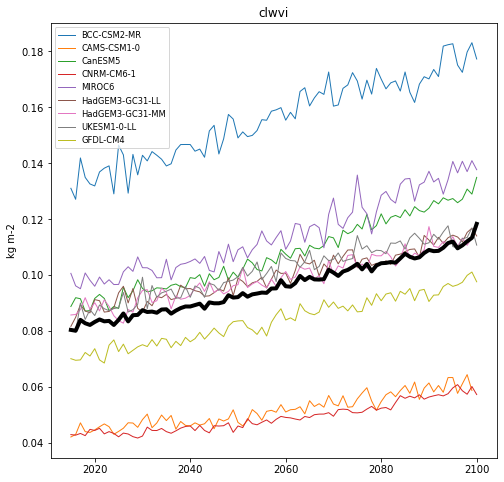

In [39]:

#### now plot
scenario='ssp585'

fig, ax = plt.subplots(1, 1, figsize = (8, 8))

ds_list = []

for model in models:
    try:
        ds_to_plot = xr.open_dataset('Preprocessed_data/cmip6/{v}/{m}_{s}.nc'.format(
            v=var, m=model, s=scenario))
    
        # fix the data which is given as fraction rather than %:
        if model in ['CIESM', 'FIO-ESM-2-0']:
            if var == 'clt':            
                ds_to_plot[var] = ds_to_plot[var]*100
        
        ds_to_plot = ds_to_plot[var].groupby("time.year").mean(dim="time")
    
        ds_list.append(ds_to_plot)
        
        ax.plot(ds_to_plot.year.values, ds_to_plot.values, lw=1,
                label=str(model))
    except:
        pass
    #ax.plot(ds_to_plot.y.values, ds_to_plot.tas.values, 
    #        ls='--')
    
#ax.axhline(0, ls='--', color='gray')
ax.legend(fontsize='small')

DS = xr.concat(ds_list, dim='model').mean(dim='model')
ax.plot(DS.year.values, DS.values, c='black', lw=4)
ax.set_ylabel(units[var])
#ax.set_xlim(-90, 90)
ax.set_title(var)
#i=i+1
#fig.supxlabel('Latitude')
#fig.suptitle(titles[var], fontsize='x-large', y=1.1)
plt.savefig('Figures/cmip6_timesries_{}.png'.format(var), dpi=350)

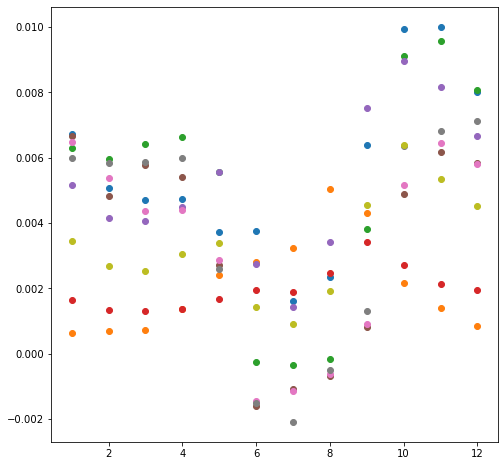

In [19]:

fig, ax = plt.subplots(1, 1, figsize = (8, 8))

for model in models:
    try:
        
        ds_to_plot = xr.open_dataset('Preprocessed_data/cmip6/{v}/{m}_{s}.nc'.format(
            v=var, m=model, s=scenario))
        if model in ['CIESM', 'FIO-ESM-2-0']:
            if var == 'clt':  
                ds_to_plot['clt'] = ds_to_plot['clt']*100
            
        lrs = []
        months = [1,2,3,4,5,6,7,8,9,10,11,12]
        for month in months:
            ds_to_plot_m = ds_to_plot.sel(time=ds_to_plot.time.dt.month==month)
            lr = stats.linregress(ds_to_plot_m.time.dt.year, ds_to_plot_m[var]).slope
            lrs.append(lr*10)
        ax.scatter(months, lrs)
    except:
        pass
    #ax.set_ylim(-1, 1)

In [20]:
# a little slow, cell makes the set of arrays which go into the box plot

months = [1,2,3,4,5,6,7,8,9,10,11,12]

lrs = []

for month in months:
    
    lrs_m = []
    
    for model in models:
        try:
            ds_to_plot = xr.open_dataset('Preprocessed_data/cmip6/{v}/{m}_{s}.nc'.format(
                v=var, m=model, s=scenario))
    
            if model in ['CIESM', 'FIO-ESM-2-0']:
                if var == 'clt':
                    ds_to_plot['clt'] = ds_to_plot['clt']*100 #convert to %
                
            ds_to_plot_m = ds_to_plot.sel(time=ds_to_plot.time.dt.month==month)
            
            lr = stats.linregress(ds_to_plot_m.time.dt.year, ds_to_plot_m[var]).slope
            lrs_m.append(lr*10) #10 to convert to %/decade
        except:
            pass
    lrs.append(lrs_m)
    
lrs_dict = dict(zip(months, lrs))

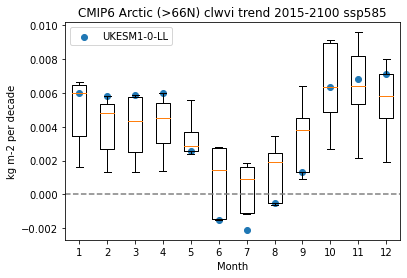

In [21]:
## now plot as boxes
fig, ax = plt.subplots()

ax.boxplot(x=lrs, labels=months, whis=[5, 95], showfliers=False)
ax.axhline(0, ls='--', color='gray')

for model in GeoMIP_mods:
    try:
        ds_to_plot = xr.open_dataset('Preprocessed_data/cmip6/{v}/{m}_{s}.nc'.format(
            v=var, m=model, s=scenario))
        if model in ['CIESM', 'FIO-ESM-2-0']:
            if var =='clt':
                ds_to_plot['clt'] = ds_to_plot['clt']*100
            
        lrs_mod = []
        for month in months:
            ds_to_plot_m = ds_to_plot.sel(time=ds_to_plot.time.dt.month==month)
            lr = stats.linregress(ds_to_plot_m.time.dt.year, ds_to_plot_m[var]).slope
            lrs_mod.append(lr*10)
        ax.scatter(months, lrs_mod, label=model)
    except:
        pass
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel(str(units[var]+' per decade'))
plt.title('CMIP6 Arctic (>66N) {v} trend 2015-2100 {s}'.format(v=var, s=scenario))
plt.savefig('Figures/{v}_trend_CMIP6_{s}.png'.format(v=var, s=scenario), dpi=350)
plt.show()

In [37]:
percentage = True # true or false
# option above allows choice between absolute diff or %, default %

### also plot the difference between scenarios

diffs_list = []
scen1, scen2 = 'ssp585', 'ssp245'

timeperiods_dict = {'ssp585':['2070', '2100'],
                    'ssp245':['2070', '2100'],
                    'historical':['1850', '1900']}

timeperiod1, timeperiod2 = timeperiods_dict[scen1], timeperiods_dict[scen2]

for month in months:
    
    diffs = []
    
    for model in models:
        try:
            ds_1 = xr.open_dataset('Preprocessed_data/cmip6/{v}/{m}_{s}.nc'.format(
                v=var, m=model, s=scen1))
            ds_1 = ds_1.sel(time=ds_1.time.dt.month==month)
            ds_1 = ds_1.sel(time=slice(timeperiod1[0], timeperiod1[1]))[var].mean(dim='time')
    
            ds_2 = xr.open_dataset('Preprocessed_data/cmip6/{v}/{m}_{s}.nc'.format(
                v=var, m=model, s=scen2))
            ds_2 = ds_2.sel(time=ds_2.time.dt.month==month)
            ds_2 = ds_2.sel(time=slice(timeperiod2[0], timeperiod2[1]))[var].mean(dim='time')
    
            if percentage == True:
                diff = 100*((ds_1 - ds_2)/ds_2).item()
            else:
                diff = (ds_1 - ds_2).item()
            diffs.append(diff)
        except:
            pass
        
    diffs_list.append(diffs)
    
#lrs_dict = dict(zip(months, lrs))

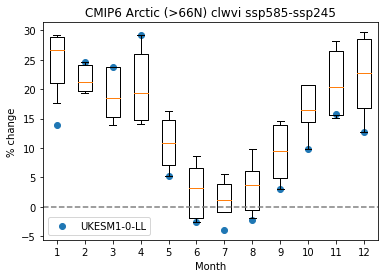

In [38]:

## now plot as boxes
fig, ax = plt.subplots()

ax.boxplot(x=diffs_list, labels=months, whis=[5, 95], showfliers=False)
ax.axhline(0, ls='--', color='gray')


for model in GeoMIP_mods:
    #print(model)
    try:
        diffs = []
        for month in months:
            #print(month)
            ds_1 = xr.open_dataset('Preprocessed_data/cmip6/{v}/{m}_{s}.nc'.format(
                v=var, m=model, s=scen1))
            ds_1 = ds_1.sel(time=ds_1.time.dt.month==month)
            ds_1 = ds_1.sel(time=slice(timeperiod1[0], timeperiod1[1]))[var].mean(dim='time')
    
            ds_2 = xr.open_dataset('Preprocessed_data/cmip6/{v}/{m}_{s}.nc'.format(
                v=var, m=model, s=scen2))
            ds_2 = ds_2.sel(time=ds_2.time.dt.month==month)
            ds_2 = ds_2.sel(time=slice(timeperiod2[0], timeperiod2[1]))[var].mean(dim='time')

            if percentage == True:
                diff = 100*((ds_1 - ds_2)/ds_2).item()
            else:
                diff = (ds_1 - ds_2).item()
            diffs.append(diff)
        ax.scatter(months, diffs, label=model)
    except:
        pass
    

ax.legend()
ax.set_xlabel('Month')
if percentage:
    ax.set_ylabel('% change')
else:    
    ax.set_ylabel(units[var])
plt.title('CMIP6 Arctic (>66N) {v} {s1}-{s2}'.format(v=var, s1=scen1, s2=scen2))
plt.savefig('Figures/{v}_diff_CMIP6_{s1}-{s2}.png'.format(v=var, s1=scen1, s2=scen2), dpi=350)
plt.show()